# pythia-features-cloudsuite

In [1]:
from importlib import reload

from matplotlib import cm
import numpy as np

from utils import plots, tables, utils
#%matplotlib widget

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Knobs
paths = {
    'degree1_cloudsuite_4c': '/u/cmolder/GitHub/ChampSim/out/pythia/4core/degree1_cloudsuite.csv',
}

suites = [
    ('cloudsuite', 'weighted')
]
metrics  = [
    'ipc_improvement', 
    #'L2C_issued_prefetches', 
    'L2C_accuracy', 
    'L2C_coverage',
    #'L2C_mpki_reduction', 
]
features = [
    {'Delta_Path', 'PC_Delta'},
]
baselines = [
    'bo'
]
dpi = 150

# Plots (suites)
Fix prefetch degree to 1 for everything.

In [3]:
dfs = {
    # 4-core
    'baseline_4c': tables.load_stats_csv(paths['degree1_cloudsuite_4c'], baselines, prefetchers_level='l2'),
    'degree1_4c': tables.load_stats_csv_pythia(paths['degree1_cloudsuite_4c'], features),
}

/u/cmolder/GitHub/pythia-analysis/utils/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)
/u/cmolder/GitHub/pythia-analysis/utils/utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.filter(regex='simpoint').fillna('default', inplace=True)


## 4-core

/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


=== cloudsuite weighted ===


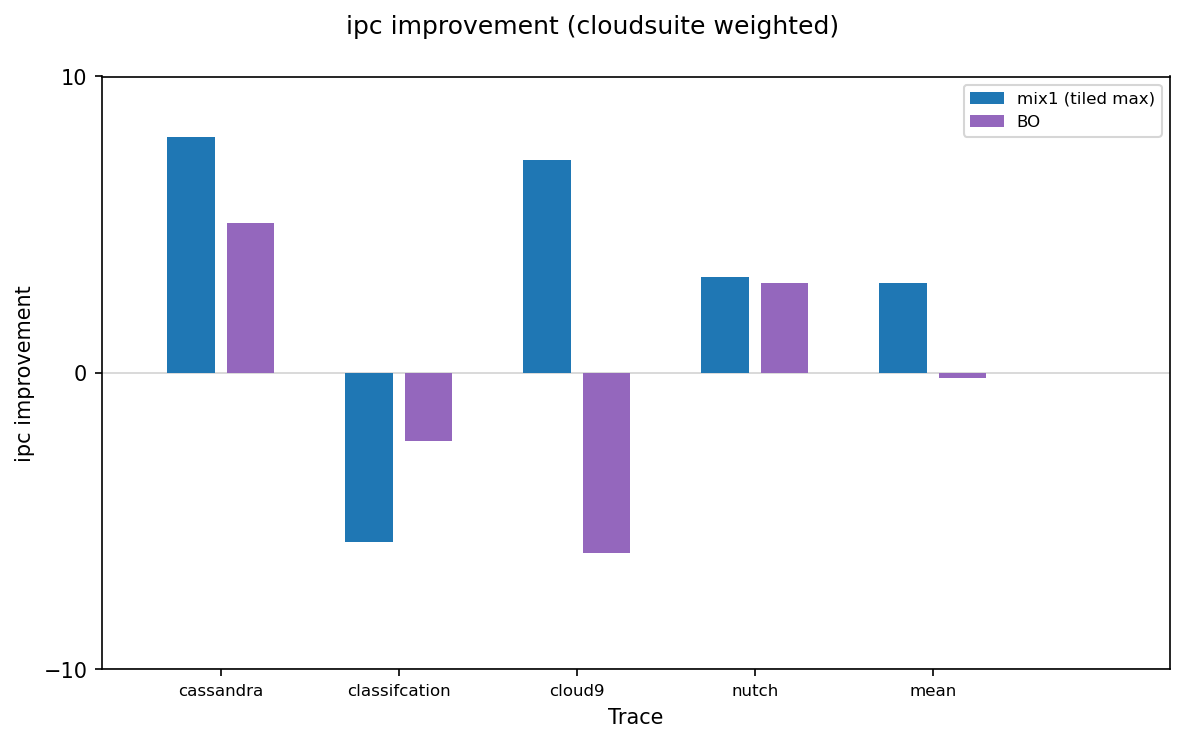

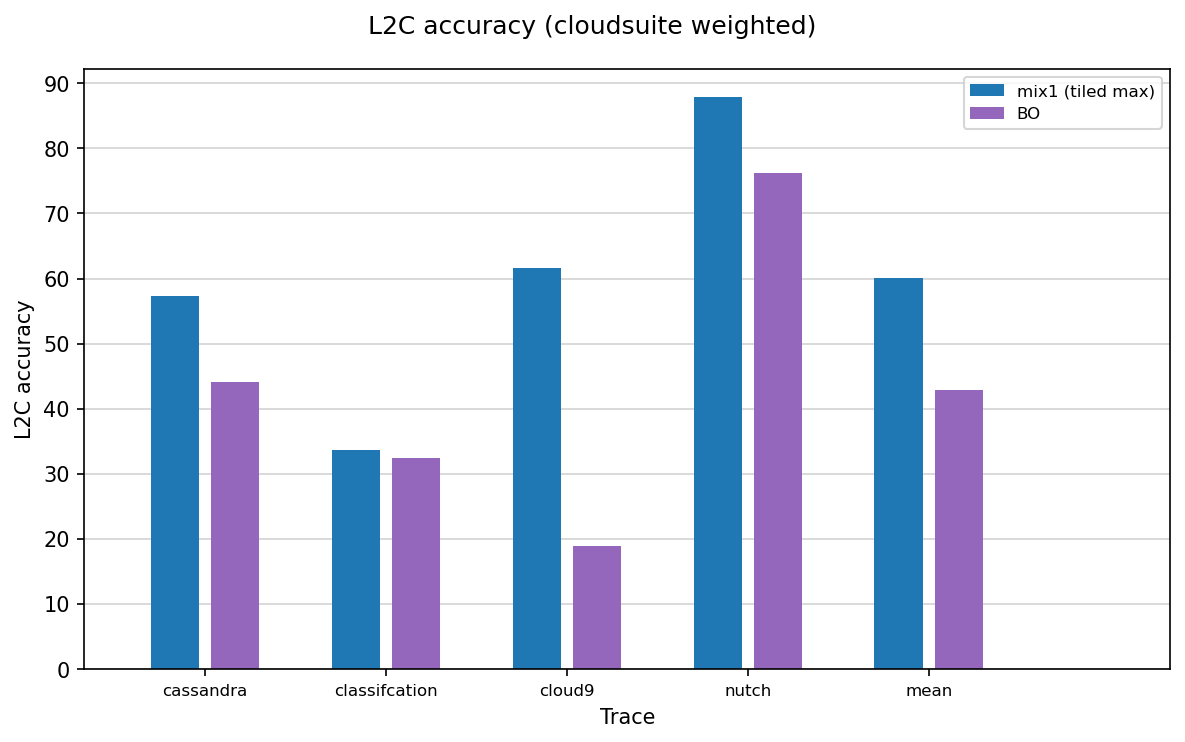

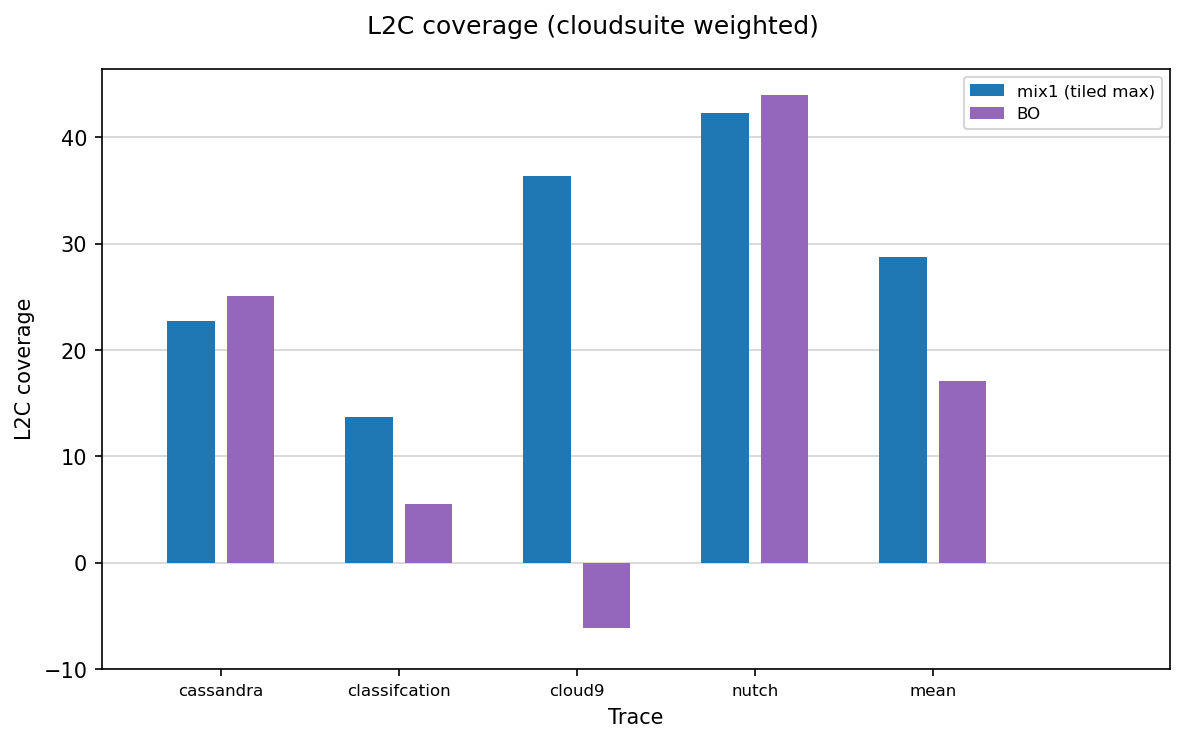

In [4]:
df_4core = {
    'mix1 (tiled max)': dfs['degree1_4c']['Delta_Path, PC_Delta'],
    'BO': dfs['baseline_4c']['bo'],
}
legend_kwargs = {
    'fontsize': 8,
    'ncol': 1,
    #'loc': 'upper left',
    #'bbox_to_anchor': (0, 1),
}
df_4core_colors = {
    'BO': 'C4'
}
label_kwargs = {
    'fontsize': 8,
    'rotation': 0
}
plots.plot_everything(df_4core, suites=suites, metrics=metrics, 
                      colors=df_4core_colors, dpi=dpi, figsize=(8, 5),
                      legend_kwargs=legend_kwargs, label_kwargs=label_kwargs)

# Tables

## 2-core

In [20]:
tables.table_everything(df_4core, suites=suites, metrics=metrics)

=== cloudsuite weighted ===
ipc_improvement


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),BO
run_name,,
cassandra_weighted,7.966065,5.049997
cloud9_weighted,7.171041,-6.069382
nutch_weighted,3.240874,3.038107
mean,6.105720,0.554235


L2C_accuracy


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),BO
run_name,,
cassandra_weighted,57.383029,44.112693
cloud9_weighted,61.543260,18.878062
nutch_weighted,87.873465,76.196147
mean,68.933251,46.395634


L2C_coverage


/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)
/u/cmolder/GitHub/pythia-analysis/utils/stats.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row)


,mix1 (tiled max),BO
run_name,,
cassandra_weighted,22.737641,25.104893
cloud9_weighted,36.337560,-6.101234
nutch_weighted,42.313226,43.980752
mean,33.796142,20.994804
